# Code-Along : Pandas

## 00 : Setting up Workshop

### Clean Namespace

In [2]:
reset -fs

### Import Libraries and Specific Functions

In [16]:
## Import Libraries
# DataFrames
import pandas as pd
# Arrays and Array Math
import numpy as np
# Basic Visualizations
import matplotlib.pyplot as plt

## Import specific Functions
# Scatter Matrix
from pandas.tools.plotting import scatter_matrix

## Settings
# Draw Plots in Notebook
%matplotlib inline 

## 02 : Data Mining

In [4]:
# Create Data
neighborhoods = ["Bayview", "Chinatown", "Excelsior", "Haight Ashbury"]
populations   = [35890, 14540, 37960, 21800]
data          = list(zip(neighborhoods, populations))

data_nb_raw   = pd.DataFrame(data =  data,
                             columns=["neighborhood", "population"])

# Import Data
data_al_raw   = pd.read_csv("data/abalone.csv")

## 03 : Data Exploration

In [5]:
data_nb_raw.population

0    35890
1    14540
2    37960
3    21800
Name: population, dtype: int64

In [6]:
data_nb_raw.population.sum()

110190

Reading a .csv (comma separated value) file.

[Source](https://archive.ics.uci.edu/ml/datasets/Abalone)

In [7]:
# First/ Last 5 Rows
print(data_al_raw.head())
print(data_al_raw.tail())

  sex  length  diameter  height  weight_whole  weight_shucked  viscera  shell  \
0   M   0.455     0.365   0.095        0.5140          0.2245   0.1010  0.150   
1   M   0.350     0.265   0.090        0.2255          0.0995   0.0485  0.070   
2   F   0.530     0.420   0.135        0.6770          0.2565   0.1415  0.210   
3   M   0.440     0.365   0.125        0.5160          0.2155   0.1140  0.155   
4   I   0.330     0.255   0.080        0.2050          0.0895   0.0395  0.055   

   n_rings  
0       15  
1        7  
2        9  
3       10  
4        7  
     sex  length  diameter  height  weight_whole  weight_shucked  viscera  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   0.2390   
4173   M   0.590     0.440   0.135        0.9660          0.4390   0.2145   
4174   M   0.600     0.475   0.205        1.1760          0.5255   0.2875   
4175   F   0.625     0.485   0.150        1.0945          0.5310   0.2610   
4176   M   0.710     0.555   0.195        1.9485  

In [8]:
# Summarize data
data_al_raw.describe()

,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
# Show Dimensions
data_al_raw.shape    

(4177, 9)

In [10]:
# Transpose data
data_al_raw.T

,0,1,2,3,4,5,6,7,8,9,...,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176
sex,M,M,F,M,I,I,F,F,M,F,...,M,F,M,M,M,F,M,M,F,M
length,0.455,0.35,0.53,0.44,0.33,0.425,0.53,0.545,0.475,0.55,...,0.5,0.515,0.52,0.55,0.56,0.565,0.59,0.6,0.625,0.71
diameter,0.365,0.265,0.42,0.365,0.255,0.3,0.415,0.425,0.37,0.44,...,0.38,0.4,0.385,0.43,0.43,0.45,0.44,0.475,0.485,0.555
height,0.095,0.09,0.135,0.125,0.08,0.095,0.15,0.125,0.125,0.15,...,0.125,0.125,0.165,0.13,0.155,0.165,0.135,0.205,0.15,0.195
weight_whole,0.514,0.2255,0.677,0.516,0.205,0.3515,0.7775,0.768,0.5095,0.8945,...,0.577,0.615,0.791,0.8395,0.8675,0.887,0.966,1.176,1.0945,1.9485
weight_shucked,0.2245,0.0995,0.2565,0.2155,0.0895,0.141,0.237,0.294,0.2165,0.3145,...,0.269,0.2865,0.375,0.3155,0.4,0.37,0.439,0.5255,0.531,0.9455
viscera,0.101,0.0485,0.1415,0.114,0.0395,0.0775,0.1415,0.1495,0.1125,0.151,...,0.1265,0.123,0.18,0.1955,0.172,0.239,0.2145,0.2875,0.261,0.3765
shell,0.15,0.07,0.21,0.155,0.055,0.12,0.33,0.26,0.165,0.32,...,0.1535,0.1765,0.1815,0.2405,0.229,0.249,0.2605,0.308,0.296,0.495
n_rings,15,7,9,10,7,8,20,16,9,19,...,9,8,10,10,8,11,10,9,10,12


In [11]:
# Sort Data
data_al_raw.sort_values(by=['n_rings', 'weight_whole']).head()

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
236,I,0.075,0.055,0.010,0.002,0.0010,0.0005,0.0015,1
719,I,0.150,0.100,0.025,0.015,0.0045,0.0040,0.0050,2
238,I,0.110,0.090,0.030,0.008,0.0025,0.0020,0.0030,3
237,I,0.130,0.100,0.030,0.013,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.014,0.0055,0.0025,0.0040,3


## 04 : Data Visualization

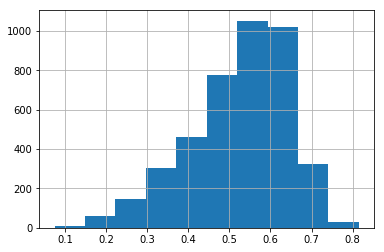

In [14]:
# Histogram of Length
data_al_raw.length.hist();

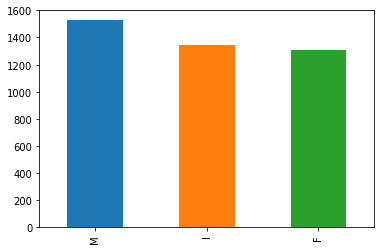

In [15]:
# Bar Plot of Sex
data_al_raw.sex.value_counts().plot(kind='bar');

Let's get fancy!

//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


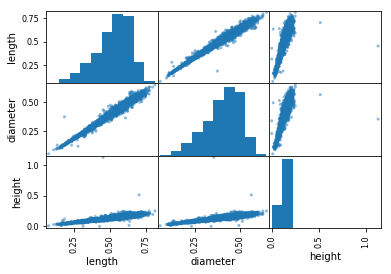

In [18]:
scatter_matrix(data_al_raw[["length", "diameter", "height"]],
              diagonal='hist');